# Linear Regression

In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0, 10.0)

In [28]:
#Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [29]:
#Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [30]:
#Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

#Calculate b1 & b2
numer = 0
denom = 0

for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
b1 = numer /denom
b0 = mean_y - (b1 * mean_x)

print(b1,b0)

0.26342933948939945 325.57342104944223


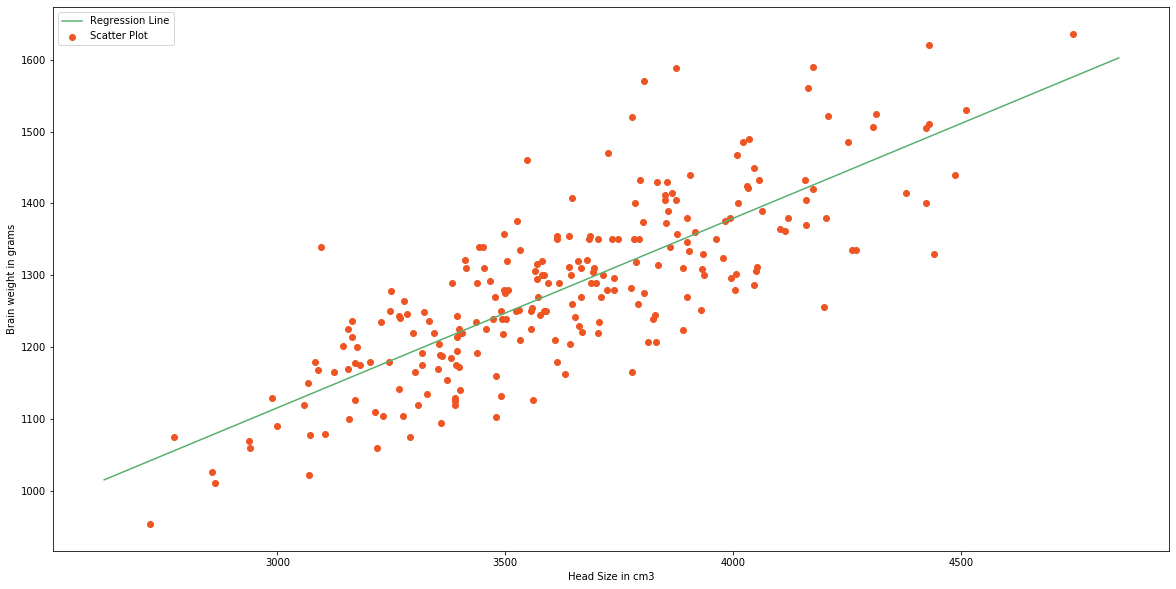

In [31]:
#Plotting values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 *x

#Plotting Line
plt.plot(x,y, color='#58b070', label='Regression Line')

#Plotting Scatter Points
plt.scatter(X,Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [32]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
#cannot use rank 1 matrix in scikit learn
X = X.reshape((n,1))

#creating model
reg = LinearRegression()

#Fitting training data
reg = reg.fit(X,Y)

#Y Prediction
Y_pred = reg.predict(X)

#Calculating R2 score
r2_score = reg.score(X, Y)



In [35]:
print(r2_score)

0.639311719957


# Multiple Linear Regression (mlr)

In [10]:
#Run these codes in Spyder IDE

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:,4]

In [13]:

#Convert the column into categorical columns
states = pd.get_dummies(X['State'], drop_first=True)

#drop the state column
X = X.drop('State', axis=1)

#concat the dummy variable
X = pd.concat([X, states], axis=1)

#Split the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [14]:
#Fitting Multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
#Predicting the test set results
y_pred = regressor.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [17]:
print(r2)

0.6393117199570003
